In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sys
sys.path.append('/Users/brandonmanley/Desktop/PhD/dijet_dsa')
import dsa_mc.dijet_fast as dutils
import random


In [3]:
# setup plotting
plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams["font.size"] = 12
plt.rcParams["legend.fontsize"] = 12
plt.rcParams["axes.labelsize"] = 14  
plt.rcParams["xtick.labelsize"] = 12  
plt.rcParams["ytick.labelsize"] = 12
plt.rcParams["axes.titlesize"] = 16  
plt.rcParams["text.usetex"] = True
plt.rcParams["text.latex.preamble"] = r"\usepackage{amsmath}"

In [5]:
# get pT spectrum for test kinematics
pT_values = np.linspace(1,30,100)

dijet_kins = dutils.Kinematics(Q= 9, z= 0.4, x= 0.01, s= 120**2, delta=0.0, phi_Dp=0.0, phi_kp=0.0)
dijet_kins.y = (dijet_kins.Q**2)/(dijet_kins.s*dijet_kins.x)
assert dijet_kins.y <= 1, 'y > 1'

dj = dutils.DIJET()
total = []
for pT in pT_values:
    dijet_kins.pT = pT
    total.append(dj.get_xsec(dijet_kins, 'unpolarized', 'dx'))
    
dsa_replicas = []
colors = []

for irep in range(1, 501):
    if irep > 100: break
    print(irep)
    nrep = random.randint(1,500)
    dj.set_params(nrep)

    # g1_value = dj.get_g1({'x': 10**(-5), 'Q': np.sqrt(10)})
    g1_value = 1.0
    if g1_value > 0: colors.append('red')
    else: colors.append('blue')

    dsa_rep = []
    for pT in pT_values:
        dijet_kins.pT = pT
        dsa_rep.append(dj.get_xsec(dijet_kins, 'DSA', 'dx'))
    
    dsa_replicas.append(dsa_rep)



1
2
3
4
5


KeyboardInterrupt: 

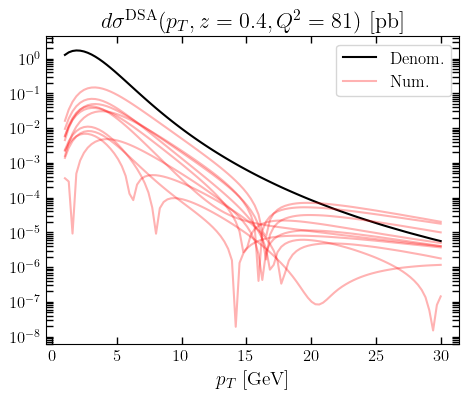

In [7]:
# plot pT spectrum
asp_ratio = 4/3
psize = 4
fig, ax = plt.subplots(1, 1, figsize=(asp_ratio*psize, psize))

ax.plot(pT_values, total, label = 'Denom.', color='black')
for id, (color, dsa) in enumerate(zip(colors, dsa_replicas)):
    # ax.plot(pT_values, dsa/total, color = 'red', alpha=0.3)
    # if id != 2: continue
    if id == 0:
        ax.plot(pT_values, np.abs(dsa), color = color, alpha=0.3, label='Num.')
    else:
        ax.plot(pT_values, np.abs(dsa), color = color, alpha=0.3)
    
# ax.axhline(y=1, color='grey', linestyle=':')
ax.axhline(y=0, color='grey', linestyle='--')
# ax.axhline(y=-1, color='grey', linestyle=':')
ax.set_xlabel(r'$p_{T}$ [GeV]')
ax.set_title(fr'$d\sigma^{{\mathrm{{DSA}}}} (p_T, z={dijet_kins.z}, Q^2={round(dijet_kins.Q**2)})\,\,[\mathrm{{pb}}]$')
ax.legend()
ax.semilogy()
# ax.set_ylim([-0.000005, 0.000005])
ax.tick_params(axis="both", direction="in", length=5, width=1, which='both', right=True, top=True)

plt.show()

In [87]:
# calc g1(x) and \Delta \Sigma

g1_replicas = []
xsigma_replicas = []
xg_replicas = []
x_values = np.logspace(-4, -1, num=50)

g1_kins = {'Q': np.sqrt(10), 'x': 0.005}

dj = dutils.DIJET()

for irep in range(1, 501):
    # if irep > 100: break
    g1_values = []
    xsigma_values = []
    xg_values = []
    nrep = random.randint(1,500)

    dj.set_params(nrep)
    print(irep, nrep)
    
    for ix, x in enumerate(x_values):
        g1_kins['x'] = x
        g1_value = dj.get_g1(g1_kins)
        g1_values.append(g1_value)

        xsigma_value = x*dj.get_DeltaSigma(g1_kins)
        xsigma_values.append(xsigma_value)

        xg_value = x*dj.get_DeltaG(g1_kins)
        xg_values.append(xg_value)

        # if ix == 25:
        #     if np.abs(g1_value) > 30: print(nrep) 
                
    g1_replicas.append(g1_values)
    xsigma_replicas.append(xsigma_values)
    xg_replicas.append(xg_values)
    

1 107
2 130
3 247
4 487
5 266
6 322
7 223
8 188
9 459
10 159
11 75
12 152
13 116
14 204
15 38
16 349
17 71
18 278
19 134
20 288
21 155
22 274
23 226
24 173
25 114
26 334
27 46
28 18
29 384
30 279
31 307
32 79
33 255
34 159
35 101
36 475
37 72
38 329
39 325
40 136
41 157
42 376
43 319
44 209
45 285
46 410
47 203
48 94
49 316
50 413
51 60
52 209
53 420
54 304
55 392
56 403
57 337
58 16
59 318
60 209
61 82
62 443
63 98
64 48
65 431
66 486
67 381
68 484
69 33
70 357
71 42
72 89
73 391
74 97
75 195
76 420
77 451
78 151
79 448
80 474
81 481
82 475
83 335
84 441
85 363
86 493
87 250
88 224
89 163
90 280
91 261
92 461
93 171
94 454
95 246
96 471
97 77
98 168
99 114
100 373
101 229
102 421
103 396
104 479
105 206
106 363
107 344
108 238
109 245
110 131
111 244
112 233
113 468
114 204
115 200
116 415
117 241
118 232
119 244
120 272
121 40
122 293
123 412
124 56
125 299
126 290
127 235
128 127
129 72
130 171
131 251
132 295
133 49
134 354
135 434
136 227
137 296
138 65
139 280
140 332
141 144
142

In [89]:
# calculate bands 

confid = 68
g1_lower = np.percentile(g1_replicas, 0.5*(100-confid), axis=0)
g1_upper = np.percentile(g1_replicas, 100 - 0.5*(100-confid), axis=0)
g1_mean  = np.mean(g1_replicas, axis=0)

xsigma_lower = np.percentile(xsigma_replicas, 0.5*(100-confid), axis=0)
xsigma_upper = np.percentile(xsigma_replicas, 100 - 0.5*(100-confid), axis=0)
xsigma_mean  = np.mean(xsigma_replicas, axis=0)

xg_lower = np.percentile(xg_replicas, 0.5*(100-confid), axis=0)
xg_upper = np.percentile(xg_replicas, 100 - 0.5*(100-confid), axis=0)
xg_mean  = np.mean(xg_replicas, axis=0)



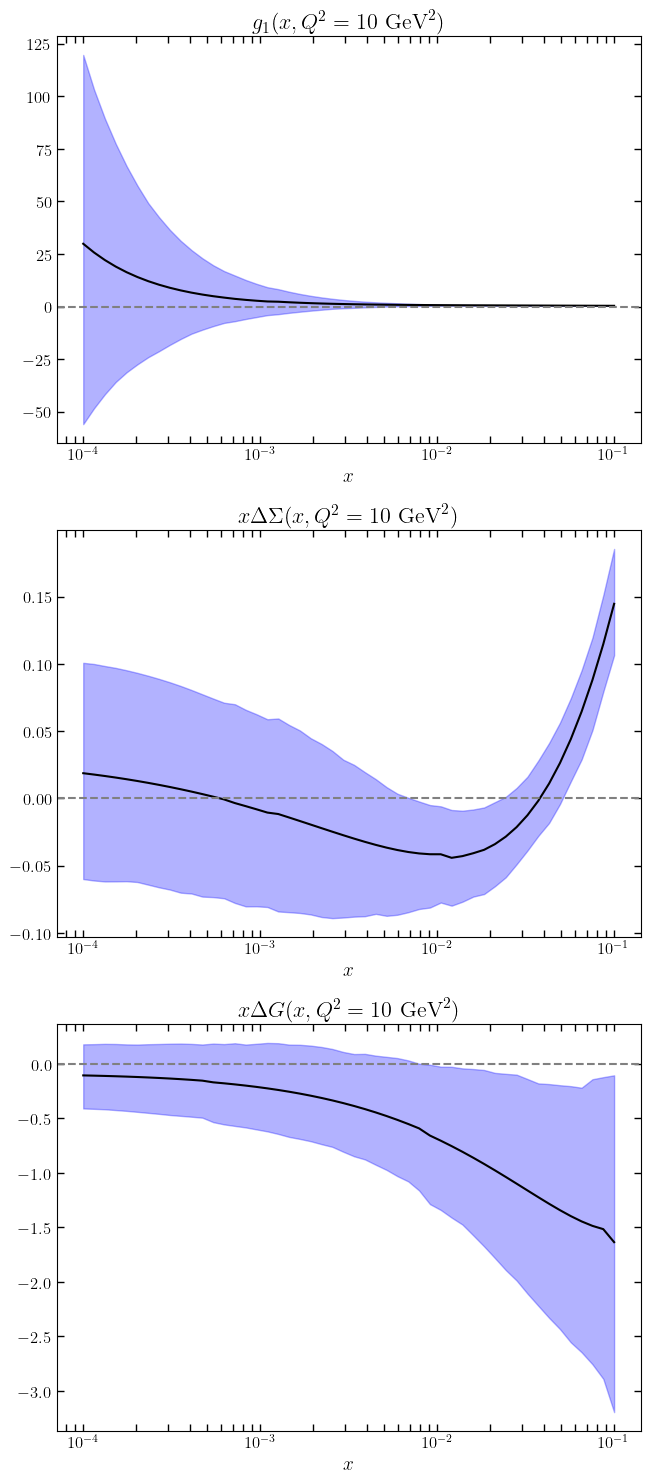

In [163]:
# plot g1(x) and \Delta \Sigma replicas
asp_ratio = 4/3
psize = 5
fig, axs = plt.subplots(3, 1, figsize=(asp_ratio*psize, psize*3))

plot_bands = True

if plot_bands:
    axs[0].plot(x_values, g1_mean, label='Mean', color='black')
    axs[0].fill_between(x_values, g1_lower, g1_upper, color='blue', alpha=0.3)
else:
    for irep, rep in enumerate(g1_replicas):
        # if irep > 0: break
        # print(rep)
        axs[0].plot(x_values, rep, color='blue',alpha=8.0/len(g1_replicas))
    
axs[0].axhline(y=0, color='grey', linestyle='--')
axs[0].set_xlabel(r'$x$')
axs[0].set_title(r'$g_1(x, Q^2 = 10\,\,\mathrm{GeV}^2)$')
# axs[0].legend()
axs[0].semilogx()
# axs[0].set_ylim([10, 3*10**7])
axs[0].tick_params(axis="both", direction="in", length=5, width=1, which='both', right=True, top=True)


if plot_bands:
    axs[1].plot(x_values, xsigma_mean, label='Mean', color='black')
    axs[1].fill_between(x_values, xsigma_lower, xsigma_upper, color='blue', alpha=0.3)
else:
    for irep, rep in enumerate(xsigma_replicas):
        # if irep > 0: break
        # print(rep)
        axs[1].plot(x_values, rep, color='blue',alpha=8.0/len(xsigma_replicas))
    
axs[1].axhline(y=0, color='grey', linestyle='--')
axs[1].set_xlabel(r'$x$')
axs[1].set_title(r'$x \Delta \Sigma(x, Q^2 = 10\,\,\mathrm{GeV}^2)$')
# ax.legend()
axs[1].semilogx()
# ax.set_ylim([10, 3*10**7])
axs[1].tick_params(axis="both", direction="in", length=5, width=1, which='both', right=True, top=True)


if plot_bands:
    axs[2].plot(x_values, xg_mean, label='Mean', color='black')
    axs[2].fill_between(x_values, xg_lower, xg_upper, color='blue', alpha=0.3)
else:
    for irep, rep in enumerate(xg_replicas):
        # if irep > 0: break
        # print(rep)
        axs[2].plot(x_values, rep, color='blue',alpha=8.0/len(xg_replicas))
    
axs[2].axhline(y=0, color='grey', linestyle='--')
axs[2].set_xlabel(r'$x$')
axs[2].set_title(r'$x \Delta G(x, Q^2 = 10\,\,\mathrm{GeV}^2)$')
# ax.legend()
axs[2].semilogx()
# ax.set_ylim([10, 3*10**7])
axs[2].tick_params(axis="both", direction="in", length=5, width=1, which='both', right=True, top=True)


plt.tight_layout()
plt.show()

In [7]:
# compute the azimuthal correlations

dijet_kins = dutils.Kinematics(Q=6, z=0.4, x= 0.01, s=120**2, delta=0.2)
dijet_kins.y = (dijet_kins.Q**2)/(dijet_kins.s*dijet_kins.x)
assert dijet_kins.y <= 1, 'y > 1'

pT_values = np.linspace(1,20,50)

dj = dutils.DIJET()

replicas = []

for irep in range(500):
    if irep > 100: break
    print(irep)
    nrep = random.randint(1,500)
    
    dj.set_params(nrep)

    # g1_value = dj.get_g1({'x': 10**(-5), 'Q': np.sqrt(10)})
    # if g1_value > 0: colors.append('red')
    # else: colors.append('blue')

    rep = {}
    rep['<1>'] = []
    rep['<cos(phi_Dp)>'] = []
    rep['<cos(phi_Dp)cos(phi_kp)>'] = []
    rep['<sin(phi_Dp)sin(phi_kp)>'] = []
    
    for pT in pT_values:
        dijet_kins.pT = pT

        rep['<1>'].append(dj.get_correlation(dijet_kins, '<1>'))
        rep['<cos(phi_Dp)>'].append(dj.get_correlation(dijet_kins, '<cos(phi_Dp)>'))
        rep['<cos(phi_Dp)cos(phi_kp)>'].append(dj.get_correlation(dijet_kins, '<cos(phi_Dp)cos(phi_kp)>'))
        rep['<sin(phi_Dp)sin(phi_kp)>'].append(dj.get_correlation(dijet_kins, '<sin(phi_Dp)sin(phi_kp)>'))

        replicas.append(rep)


0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100


In [31]:
# calculate bands for correlations

confid = 68

bands = {}
bands['lower'] = {}
bands['upper'] = {}
bands['mean'] = {}

for corr in replicas[0].keys():
    corr_reps = [rep[corr] for rep in replicas]
    bands['lower'][corr] = np.percentile(corr_reps, 0.5*(100-confid), axis=0)
    bands['upper'][corr] = np.percentile(corr_reps, 100 - 0.5*(100-confid), axis=0)
    bands['mean'][corr] = np.mean(corr_reps, axis=0)



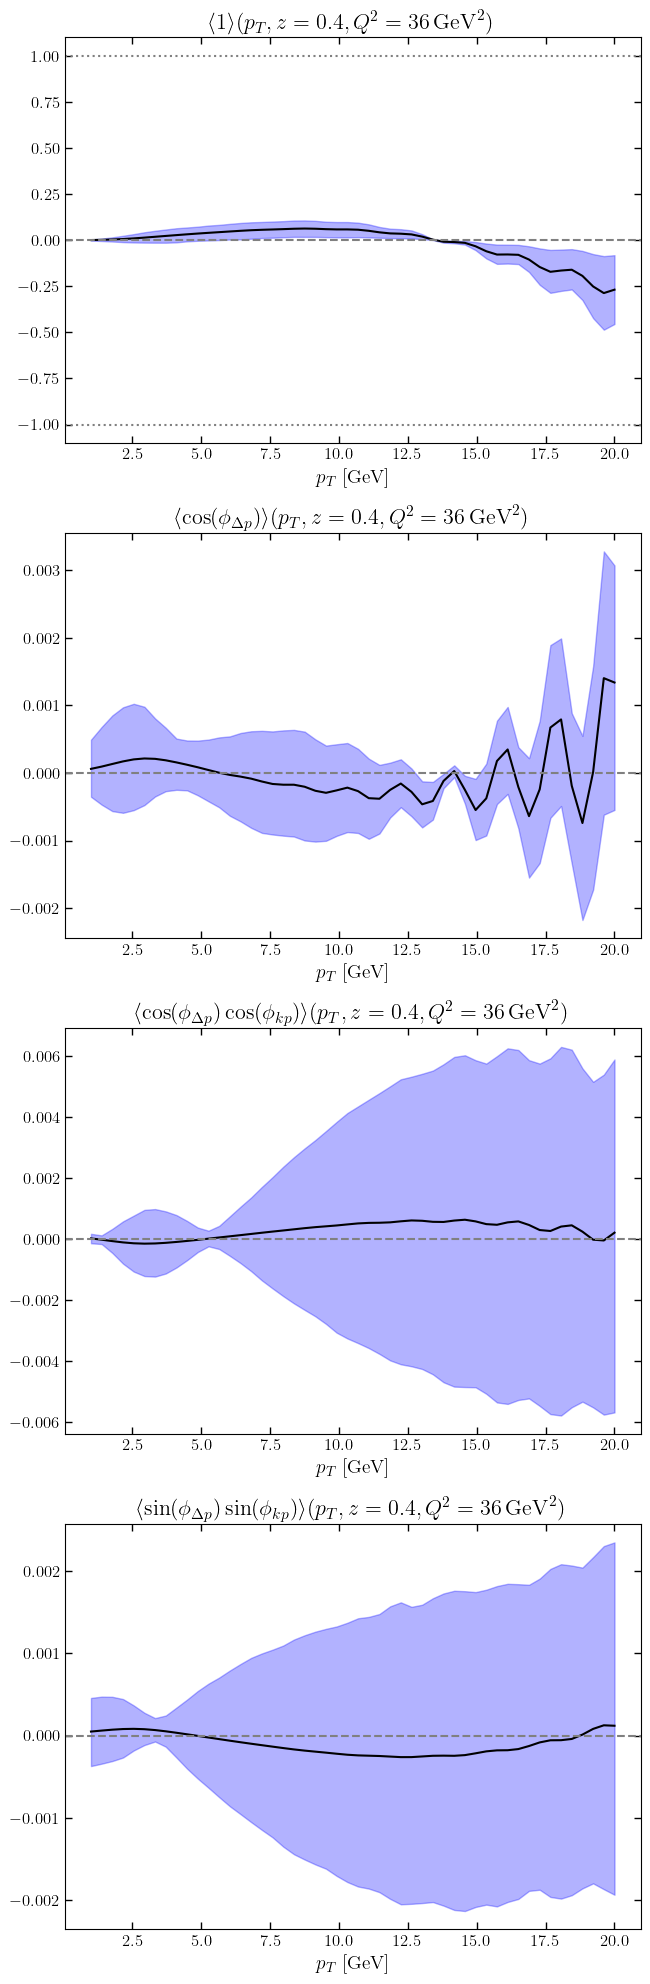

In [35]:
# plot azimuthal correlations
asp_ratio = 4/3
psize = 5
fig, axs = plt.subplots(4, 1, figsize=(asp_ratio*psize, psize*4))

pT_values = np.linspace(1,20,50)
plot_bands = True

for icorr, corr in enumerate(replicas[0].keys()):
    if plot_bands:
        axs[icorr].plot(pT_values, bands['mean'][corr], color='black')
        axs[icorr].fill_between(pT_values, bands['lower'][corr], bands['upper'][corr], color='blue', alpha=0.3)
    
    else:
        for rep in replicas:
            axs[icorr].plot(pT_values, rep[corr], color='black', alpha=0.2)

axs[0].axhline(y=1, color='grey', linestyle=':')
axs[0].axhline(y=-1, color='grey', linestyle=':')
axs[0].axhline(y=0, color='grey', linestyle='--')
axs[0].set_xlabel(r'$p_{T}$ [GeV]')
axs[0].set_title(fr'$ \langle 1 \rangle (p_T, z={dijet_kins.z}, Q^2={round(dijet_kins.Q**2)}\, \mathrm{{GeV}}^2)$')
axs[0].tick_params(axis="both", direction="in", length=5, width=1, which='both', right=True, top=True)
# axs[0].semilogy()
# axs[0].set_ylim([-1.5, 1.5])

axs[1].axhline(y=0, color='grey', linestyle='--')
axs[1].set_xlabel(r'$p_{T}$ [GeV]')
axs[1].set_title(fr'$ \langle \cos(\phi_{{\Delta p}}) \rangle (p_T, z={dijet_kins.z}, Q^2={round(dijet_kins.Q**2)}\, \mathrm{{GeV}}^2)$')
axs[1].tick_params(axis="both", direction="in", length=5, width=1, which='both', right=True, top=True)
# axs[1].set_ylim([-1.5, 1.5])


axs[2].axhline(y=0, color='grey', linestyle='--')
axs[2].set_xlabel(r'$p_{T}$ [GeV]')
axs[2].set_title(fr'$ \langle \cos(\phi_{{\Delta p}}) \cos(\phi_{{k p}}) \rangle (p_T, z={dijet_kins.z}, Q^2={round(dijet_kins.Q**2)}\, \mathrm{{GeV}}^2)$')
axs[2].tick_params(axis="both", direction="in", length=5, width=1, which='both', right=True, top=True)
# axs[2].set_ylim([-1.5, 1.5])

axs[3].axhline(y=0, color='grey', linestyle='--')
axs[3].set_xlabel(r'$p_{T}$ [GeV]')
axs[3].set_title(fr'$ \langle \sin(\phi_{{\Delta p}}) \sin(\phi_{{k p}})  \rangle (p_T, z={dijet_kins.z}, Q^2={round(dijet_kins.Q**2)}\, \mathrm{{GeV}}^2)$')
axs[3].tick_params(axis="both", direction="in", length=5, width=1, which='both', right=True, top=True)
# axs[3].set_ylim([-1.5, 1.5])
# axs[1].legend()
    # axs[0].semilogy()
    # ax.set_ylim([10, 10**8])
plt.tight_layout()
plt.show()


# fig.savefig('azcorr_ic1.pdf', dpi=400, bbox_inches="tight")


In [29]:
# make Fourier-Bessel transform data

test_kins = dutils.Kinematics()
test_kins.Q = 9
test_kins.x = 0.01
test_kins.z = 0.4
w2 = (test_kins.Q**2)*((1/test_kins.x)-1)
print('W^2:', w2)

pT_values = np.linspace(1, 50, 200)

nfbs = {}
qfbs = {}
g2fbs = {}
gTfbs = {}

eps = [0.0, 5.0, 10.0]

for ie in eps:
    dj = dutils.DIJET(gauss_param=ie)
    
    nFBs = []
    qFBs = []
    g2FBs = []
    for pT in pT_values:
        test_kins.pT = pT
        testN_FB = dj.fourier_bessel(test_kins, [[1,1,0,0]], 'N')
        testQ_FB = (1/(pT**3))*dj.fourier_bessel(test_kins, [[1,1,0,0]], 'Qu')/w2
        testG2_FB = (1/(pT**3))*dj.fourier_bessel(test_kins, [[1,1,0,0]], 'G2')/w2
    
        nFBs.append(testN_FB)
        qFBs.append(testQ_FB)
        g2FBs.append(testG2_FB)
        
    nFBs = np.array(nFBs)
    qFBs = np.array(qFBs)
    g2FBs = np.array(g2FBs)

    nfbs[ie] = nFBs
    qfbs[ie] = qFBs
    g2fbs[ie] = g2FBs
  

W^2: 8019.0


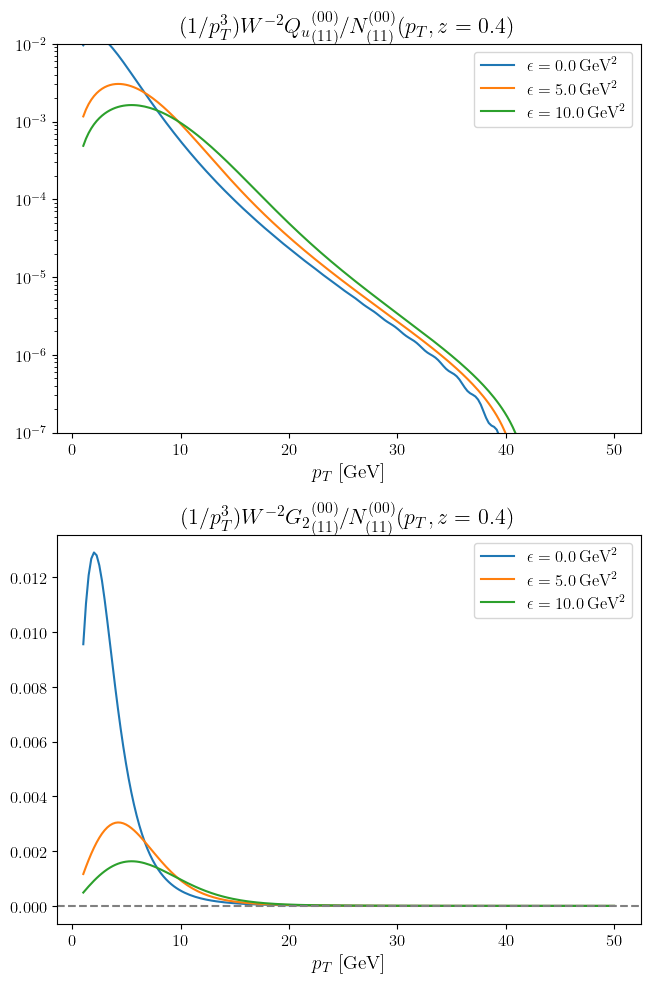

In [30]:
# plot FB transform 
asp_ratio = 4/3
psize = 5
fig, axs = plt.subplots(2, 1, figsize=(asp_ratio*psize, psize*2))

for ie in eps:
    # axs[0].plot(pT_values, np.abs(qfbs[iQ])/np.abs(nfbs[iQ]), label=fr'$Q^2 = {round(iQ**2)}\,\mathrm{{GeV}}^{{2}}$')
    # axs[1].plot(pT_values, np.abs(g2fbs[iQ])/np.abs(nfbs[iQ]), label=fr'$Q^2 = {round(iQ**2)}\,\mathrm{{GeV}}^{{2}}$')
    axs[0].plot(pT_values, nfbs[ie], label=fr'$\epsilon = {ie}\,\mathrm{{GeV}}^{{2}}$')
    axs[1].plot(pT_values, nfbs[ie], label=fr'$\epsilon = {ie}\,\mathrm{{GeV}}^{{2}}$')

for ax in axs:
    ax.axhline(y=0, color='grey', linestyle='--')
    ax.set_xlabel(r'$p_{T}$ [GeV]')
    ax.legend()
    # ax.set_ylim([0, 2])

axs[0].axes.set_title(fr'$(1/p_T^3) W^{{-2}}{{Q_u}}_{{(11)}}^{{(00)}}/N_{{(11)}}^{{(00)}}(p_T, z={test_kins.z})$')
axs[0].semilogy()
axs[0].set_ylim([10**(-7), 10**(-2)])

axs[1].axes.set_title(fr'$(1/p_T^3) W^{{-2}}{{G_2}}_{{(11)}}^{{(00)}}/N_{{(11)}}^{{(00)}}(p_T, z={test_kins.z})$')
# axes[1].semilogy()

plt.tight_layout()
plt.show()

# fig.savefig('QFB.pdf', dpi=400, bbox_inches="tight")

In [69]:
# make data for FB contour plot

pT_values = np.linspace(1,30,100)
Q_values = np.linspace(1,10,100)
fb_kins = {'z': 0.4, 'x': 0.01} 

pT_grid = np.zeros((100, 100))
Q_grid = np.zeros((100, 100))
fb_grid = np.zeros((100, 100))

dj = dutils.DIJET(1)

for i, pT in enumerate(pT_values):
    for j, Q in enumerate(Q_values):

        pT_grid[i,j] = pT
        Q_grid[i,j] = Q*np.sqrt(0.4*(1-0.4))

        fb_kins['pT'] = pT
        fb_kins['Q'] = Q
        
        fb_value = np.log(np.abs(dj.fourier_bessel(fb_kins, [[1,1,0,0]], 'N')))
        fb_grid[i,j] = fb_value
        

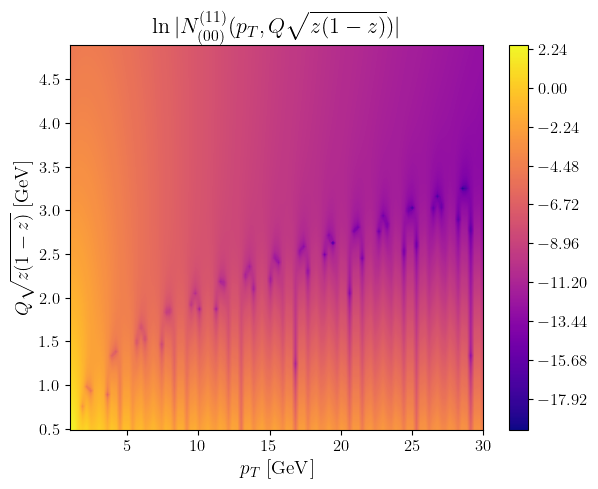

In [111]:
# make fb contour plot
asp_ratio = 4/3
psize = 5
fig, ax = plt.subplots(1, 1, figsize=(asp_ratio*psize, psize))

# ax.contour(pT_grid, Q_grid, fb_grid, levels=10, colors='black')
contour = ax.contourf(pT_grid, Q_grid, fb_grid, levels=300, cmap='plasma')  # More levels = smoother
cbar = fig.colorbar(contour, ax=ax)
ax.set_xlabel(r'$p_T\,\,[\mathrm{GeV}]$')
ax.set_ylabel(r'$Q \sqrt{z(1-z)} \,\,[\mathrm{GeV}]$')
ax.set_title(r'$\ln|N^{(11)}_{(00)} (p_T, Q \sqrt{z(1-z)})|$')

fig.savefig('fb_oscillation_map.png', dpi=700)

plt.show()

In [21]:
# compare IR regulating functions
pT_values = np.linspace(1,10,100)

zetas_g = [5, 10, 20]
zetas_s = [1, 2, 3]
cuts = [0, -1, -2]
test_r0 = 0.8

testIR_kins = {'Q':np.sqrt(5), 'z': 0.4, 'x': 0.01, 's': 100**2, 'delta':0.2, 'phi_Dp':0.0, 'phi_kp':0.0}
testIR_kins['y'] = (testIR_kins['Q']**2)/(testIR_kins['s']*testIR_kins['x'])

# fourier_bessel(self, kvar, indices, amp, lamIR = 0.3, IR_reg = [None, 0])

testQ_gauss = [np.array([dj.fourier_bessel({'pT': ipT} | testIR_kins, [0,0,0,0], 'Qu', IR_reg = ['gauss', zeta]) for ipT in pT_values]) for zeta in zetas_g]
testQ_skin = [np.array([dj.fourier_bessel({'pT': ipT} | testIR_kins, [0,0,0,0], 'Qu', IR_reg = ['skin', zeta, test_r0]) for ipT in pT_values]) for zeta in zetas_s]
testQ_cut = [np.array([dj.fourier_bessel({'pT': ipT} | testIR_kins, [0,0,0,0], 'Qu', IR_reg = ['cut', icut]) for ipT in pT_values]) for icut in cuts]



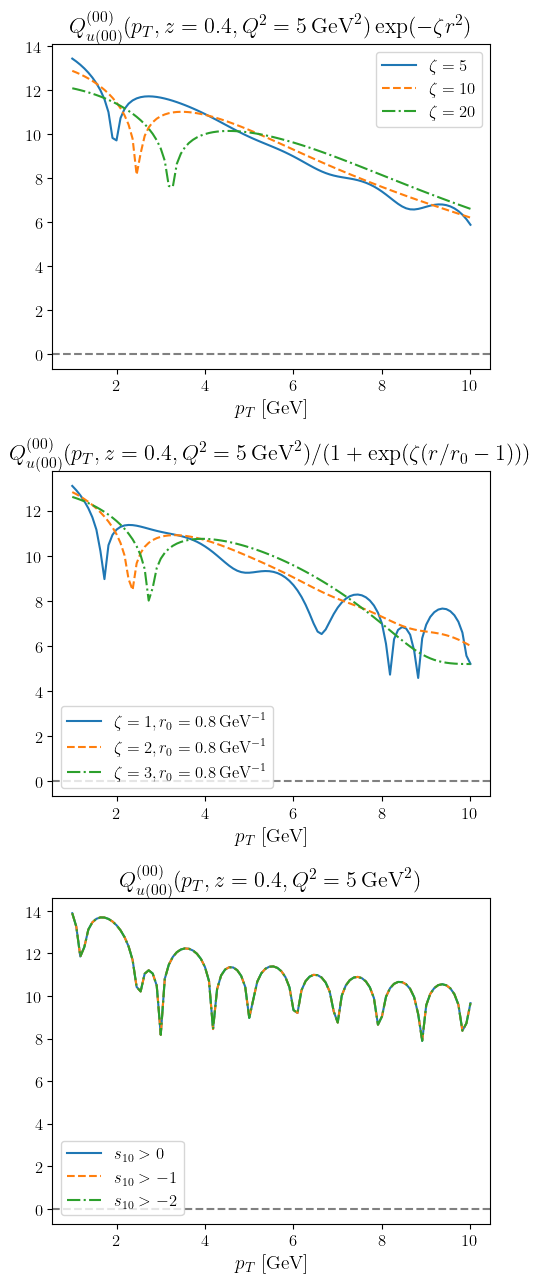

In [53]:
# IR regulator plots
fig, axes = plt.subplots(3,1, figsize=(5, 13))

lines = ['-', '--', '-.', ':']

for iz, zeta in enumerate(zetas_g):
    axes[0].plot(pT_values, np.log(np.abs(testQ_gauss[iz])), label = fr'$\zeta = {zeta}$', linestyle = lines[iz])

axes[0].axhline(y=0, color='grey', linestyle='--')
axes[0].set_xlabel(r'$p_{T}$ [GeV]')
axes[0].set_title(fr'$Q_{{u(00)}}^{{(00)}}(p_T, z={testIR_kins['z']}, Q^2={round(testIR_kins['Q']**2)}\,\mathrm{{GeV}}^2) \exp(-\zeta r^2)$')
axes[0].legend()
# axes[0].semilogy()

for iz, zeta in enumerate(zetas_s):
    axes[1].plot(pT_values, np.log(np.abs(testQ_skin[iz])), label = fr'$\zeta = {zeta}, r_0 = {test_r0}\, \mathrm{{GeV}}^{{-1}}$', linestyle = lines[iz])

axes[1].axhline(y=0, color='grey', linestyle='--')
axes[1].set_xlabel(r'$p_{T}$ [GeV]')
axes[1].set_title(fr'$Q_{{u(00)}}^{{(00)}}(p_T, z={testIR_kins['z']}, Q^2={round(testIR_kins['Q']**2)}\,\mathrm{{GeV}}^2)/(1 + \exp(\zeta (r/r_0 -1)))$')
axes[1].legend()
# axes[0].semilogy()

for ic, cut in enumerate(cuts):
    axes[2].plot(pT_values, np.log(np.abs(testQ_cut[ic])), label = fr'$s_{{10}} > {cut}$', linestyle = lines[ic])

axes[2].axhline(y=0, color='grey', linestyle='--')
axes[2].set_xlabel(r'$p_{T}$ [GeV]')
axes[2].set_title(fr'$Q_{{u(00)}}^{{(00)}}(p_T, z={testIR_kins['z']}, Q^2={round(testIR_kins['Q']**2)}\,\mathrm{{GeV}}^2)$')
axes[2].legend()
# axes[0].semilogy()

plt.tight_layout()
plt.show()


# fig.savefig(f"IR_regs{tag}.png")


